In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 전처리 작업

## 1.1. 개괄적 확인

In [2]:
train = pd.read_csv('FiFA_train.csv')

In [3]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [4]:
train.info() # 결측치를 확인하고, object 타입과 int/float 타입을 구분한다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


## 1.2. 개별 수치 확인 및 처리 작업

### 1.2.1. 이산값(범주값) (수치형) - 수치화 작업 없음

#### 1.2.1.1. stat_skill_moves

In [5]:
train['stat_skill_moves'].value_counts().sort_index() # 결측치 없음

1.0    1008
2.0    3905
3.0    3473
4.0     515
5.0      31
Name: stat_skill_moves, dtype: int64

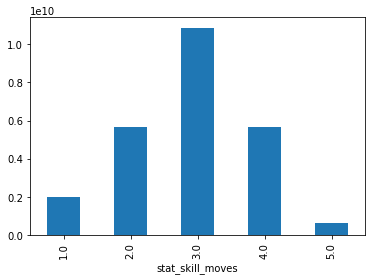

In [6]:
train.groupby('stat_skill_moves')['value'].sum().plot(kind='bar');

#### 1.2.1.2. reputation

In [7]:
train['reputation'].value_counts().sort_index() # 결측치 없음

1.0    8014
2.0     706
3.0     177
4.0      31
5.0       4
Name: reputation, dtype: int64

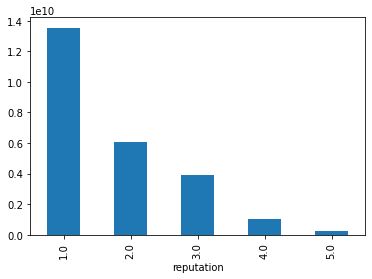

In [8]:
train.groupby('reputation')['value'].sum().plot(kind='bar');

### 1.2.2. 이산값(범주값) (비수치형) - 수치화 작업

#### 1.2.2.1. continent

In [9]:
train['continent'].value_counts().sort_values(ascending=False)

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

In [10]:
continent_mapping= {'europe': 4 ,'south america' : 3, 'asia' : 2, 'africa' : 1, 'oceania': 0}
train['continent'].map(continent_mapping).value_counts()

4    5322
3    1927
2     787
1     721
0     175
Name: continent, dtype: int64

In [11]:
train['continent'] = train['continent'].map(continent_mapping)

In [12]:
train.groupby('continent')['value'].sum()

continent
0    1.439450e+08
1    2.142990e+09
2    8.146600e+08
3    6.134035e+09
4    1.558348e+10
Name: value, dtype: float64

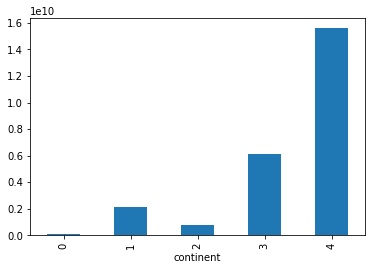

In [13]:
train.groupby('continent')['value'].sum().plot(kind='bar');

#### 1.2.2.2. position

In [14]:
train['position'].value_counts()

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

In [15]:
position_mapping= {'MF':3 , 'DF' : 2, 'ST' : 1, 'GK' : 0}
train['position'].map(position_mapping).value_counts()

3    3428
2    2791
1    1705
0    1008
Name: position, dtype: int64

In [16]:
train['position'] =train['position'].map(position_mapping)

In [17]:
train['position'].value_counts()

3    3428
2    2791
1    1705
0    1008
Name: position, dtype: int64

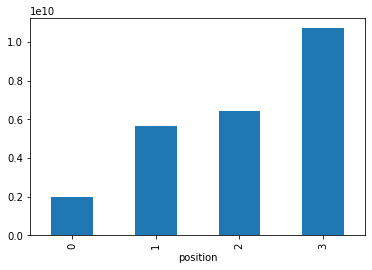

In [18]:
train.groupby('position')['value'].sum().plot(kind='bar');

#### 1.2.3. prefer_foot

In [19]:
prefer_foot_mapping = {'right' :1, 'left': 0}

In [20]:
train['prefer_foot'].map(prefer_foot_mapping).value_counts()

1    6837
0    2095
Name: prefer_foot, dtype: int64

In [21]:
train['prefer_foot']=train['prefer_foot'].map(prefer_foot_mapping)

In [22]:
train['prefer_foot'].value_counts()

1    6837
0    2095
Name: prefer_foot, dtype: int64

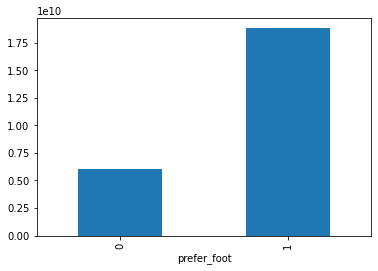

In [23]:
train.groupby('prefer_foot')['value'].sum().plot(kind='bar');

#### 2.1.2.4. contract_until

In [24]:
train['contract_until'].value_counts() #통일되지 않은 자료 확인

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [25]:
train['contract_until']

0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: contract_until, Length: 8932, dtype: object

In [26]:
def func(string):
    string=string[-4:]
    return int(string)

train['contract_until']= train['contract_until'].apply(func) #연도 이외 부분 제거

In [27]:
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

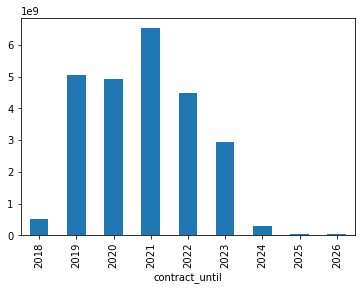

In [28]:
train.groupby('contract_until')['value'].sum().plot(kind='bar');

## 1.3. 모델 적용에 필요 없는 칼럼 삭제

### 1.3.1. 모든 값이 다른 칼럼 칼럼 삭제

In [29]:
train['id'].value_counts()

0        1
10556    1
10546    1
10548    1
10549    1
        ..
5020     1
5017     1
5016     1
5014     1
16948    1
Name: id, Length: 8932, dtype: int64

In [30]:
train['name'].value_counts()

L. Messi              1
S. Tanabe             1
P. Wiegers            1
P. Breitkreuz         1
K. Rendón             1
                     ..
P. Álvarez            1
B. Urribarri          1
D. Larsson            1
S. Delev              1
N. Christoffersson    1
Name: name, Length: 8932, dtype: int64

In [31]:
train.drop(['id', 'name'], axis=1, inplace=True)

### 1.3.2. 양적 의미 없는 수치값 삭제

## 1.4. 상관관계 파악

In [32]:
#train_heatmap = train.drop(['continent','position','prefer_foot'], axis=1, inplace=True) #양적 의미 없는 단순 범주 값 삭제 

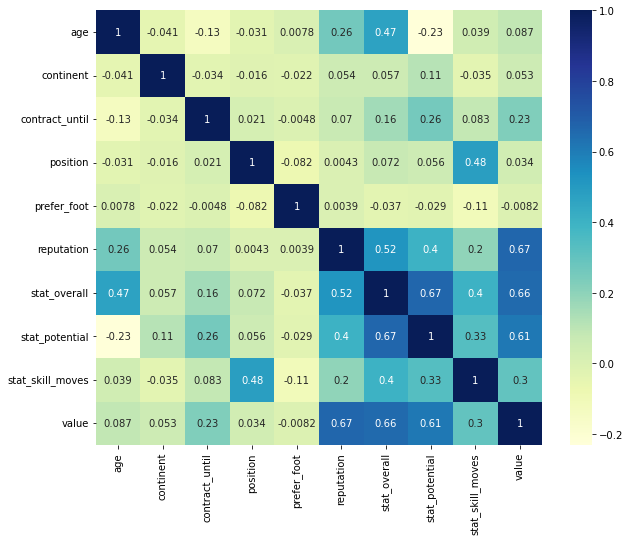

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap="YlGnBu")
plt.show()

### 1.4.1. 최종 결과

In [33]:
train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,3,2021,1,0,5.0,94,94,4.0,110500000.0
1,27,4,2020,0,1,4.0,91,93,1.0,72000000.0
2,31,3,2021,1,1,5.0,91,91,3.0,80000000.0
3,32,4,2020,2,1,4.0,91,91,3.0,51000000.0
4,25,4,2021,0,1,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...
8927,18,1,2019,3,1,1.0,48,63,3.0,60000.0
8928,19,4,2020,2,1,1.0,47,59,2.0,40000.0
8929,18,3,2021,2,1,1.0,47,64,2.0,50000.0
8930,18,4,2021,0,1,1.0,47,65,1.0,50000.0


In [34]:
# data.drop(['name','id','reputation','stat_overall','stat_potential'], axis=1, inplace= True)